In [3]:
 import tensorflow
 from tensorflow import keras
 from tensorflow.keras import Sequential
 from tensorflow.keras.layers import Dense, Flatten

In [6]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[0].shape

(28, 28)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

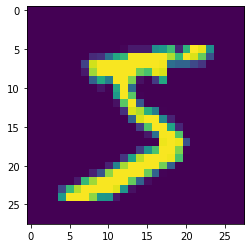

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


In [15]:
X_train = X_train/255
X_test = X_test/255

In [46]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(120, activation='relu',))
model.add(Dense(20, activation='relu',))
model.add(Dense(10, activation='Softmax'))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 120)               94200     
                                                                 
 dense_7 (Dense)             (None, 20)                2420      
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
Total params: 96,830
Trainable params: 96,830
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [49]:
history= model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3082 - accuracy: 0.9089 - val_loss: 0.1576 - val_accuracy: 0.9508
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1326 - accuracy: 0.9598 - val_loss: 0.1205 - val_accuracy: 0.9644
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0911 - accuracy: 0.9725 - val_loss: 0.1177 - val_accuracy: 0.9626
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0688 - accuracy: 0.9791 - val_loss: 0.0948 - val_accuracy: 0.9706
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0911 - val_accuracy: 0.9735
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0416 - accuracy: 0.9876 - val_loss: 0.1008 - val_accuracy: 0.9729
Epoch 7/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0928 - val_accuracy:

In [50]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [51]:
y_pred = y_prob.argmax(axis=1)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9753

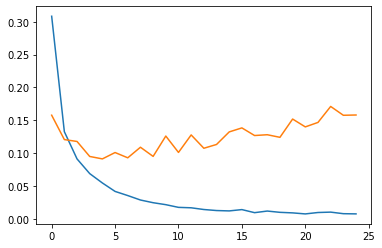

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

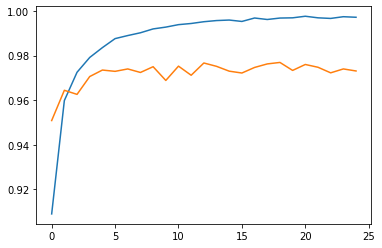

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

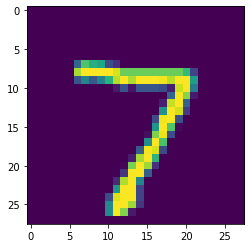

In [56]:
plt.imshow(X_test[0])

In [59]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 19ms/step


array([7])

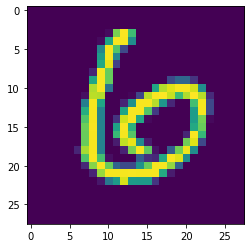

In [62]:
plt.imshow(X_test[11])

In [64]:
model.predict(X_test[11].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 28ms/step


array([6])